In [2]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=5,
                   batch_size=256,
                   validation_data=(x_val, y_val))

Epoch 1/5
59/59 [==============================] - 2s 28ms/step - loss: 0.4370 - acc: 0.8263 - val_loss: 0.3237 - val_acc: 0.8779
Epoch 2/5
59/59 [==============================] - 1s 23ms/step - loss: 0.2404 - acc: 0.9156 - val_loss: 0.2952 - val_acc: 0.8793
Epoch 3/5
59/59 [==============================] - 1s 25ms/step - loss: 0.1735 - acc: 0.9398 - val_loss: 0.2842 - val_acc: 0.8840
Epoch 4/5
59/59 [==============================] - 39s 659ms/step - loss: 0.1313 - acc: 0.9567 - val_loss: 0.3104 - val_acc: 0.8834
Epoch 5/5
59/59 [==============================] - 23s 396ms/step - loss: 0.1036 - acc: 0.9651 - val_loss: 0.3246 - val_acc: 0.8829


In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

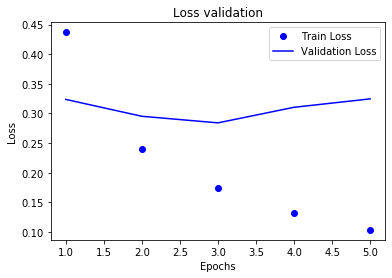

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

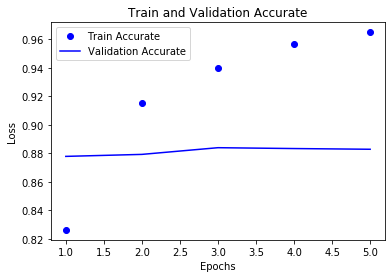

In [18]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Train Accurate')
plt.plot(epochs, val_acc, 'b', label='Validation Accurate')
plt.title('Train and Validation Accurate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/6
49/49 [==============================] - 1s 15ms/step - loss: 0.4594 - accuracy: 0.8198
Epoch 2/6
49/49 [==============================] - 1s 13ms/step - loss: 0.2634 - accuracy: 0.9089
Epoch 3/6
49/49 [==============================] - 1s 14ms/step - loss: 0.2002 - accuracy: 0.9290
Epoch 4/6
49/49 [==============================] - 1s 14ms/step - loss: 0.1670 - accuracy: 0.9395
Epoch 5/6
49/49 [==============================] - 1s 14ms/step - loss: 0.1441 - accuracy: 0.9490
Epoch 6/6
782/782 [==============================] - 4s 5ms/step - loss: 0.3310 - accuracy: 0.8763


In [20]:
results

[0.33095747232437134, 0.8762800097465515]

In [21]:
model.predict(x_test)

array([[0.13021252],
       [0.9999444 ],
       [0.81238794],
       ...,
       [0.10266823],
       [0.03934777],
       [0.6399675 ]], dtype=float32)

In [26]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=8,
                   batch_size=256,
                   validation_data=(x_val, y_val))

Epoch 1/8
59/59 [==============================] - 29s 484ms/step - loss: 0.4188 - accuracy: 0.8250 - val_loss: 0.2959 - val_accuracy: 0.8854
Epoch 2/8
59/59 [==============================] - 20s 346ms/step - loss: 0.2202 - accuracy: 0.9201 - val_loss: 0.3064 - val_accuracy: 0.8761
Epoch 3/8
59/59 [==============================] - 44s 746ms/step - loss: 0.1566 - accuracy: 0.9435 - val_loss: 0.2933 - val_accuracy: 0.8856
Epoch 4/8
59/59 [==============================] - 39s 655ms/step - loss: 0.1201 - accuracy: 0.9557 - val_loss: 0.3263 - val_accuracy: 0.8794
Epoch 5/8
59/59 [==============================] - 31s 522ms/step - loss: 0.0875 - accuracy: 0.9703 - val_loss: 0.3667 - val_accuracy: 0.8753
Epoch 6/8
59/59 [==============================] - 3s 49ms/step - loss: 0.0618 - accuracy: 0.9799 - val_loss: 0.4068 - val_accuracy: 0.8744
Epoch 7/8
59/59 [==============================] - 3s 50ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.4650 - val_accuracy: 0.8737
Epoch 8/8


In [27]:
history_dict = history.history

In [32]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

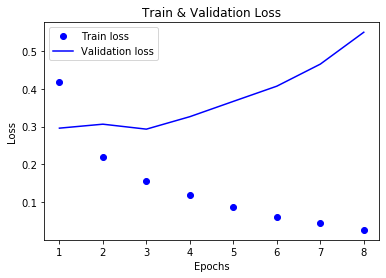

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Train & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

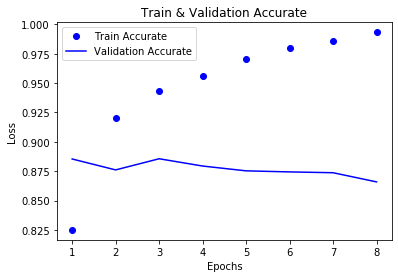

In [35]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Train Accurate')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accurate')
plt.title('Train & Validation Accurate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [39]:
model = models.Sequential()
model.add(layers.Dense(8, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(8, activation='tanh')) 
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(1, activation='relu'))   # Binary results(0, 1), Activation should be sigmoid
model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=12,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/12
30/30 [==============================] - 2s 72ms/step - loss: 0.1755 - acc: 0.7473 - val_loss: 0.1033 - val_acc: 0.8653
Epoch 2/12
30/30 [==============================] - 11s 356ms/step - loss: 0.0776 - acc: 0.8993 - val_loss: 0.0896 - val_acc: 0.8824
Epoch 3/12
30/30 [==============================] - 1s 49ms/step - loss: 0.0547 - acc: 0.9307 - val_loss: 0.0898 - val_acc: 0.8795
Epoch 4/12
30/30 [==============================] - 22s 737ms/step - loss: 0.0429 - acc: 0.9469 - val_loss: 0.0947 - val_acc: 0.8784
Epoch 5/12
30/30 [==============================] - 35s 1s/step - loss: 0.0336 - acc: 0.9598 - val_loss: 0.0971 - val_acc: 0.8789
Epoch 6/12
30/30 [==============================] - 47s 2s/step - loss: 0.0287 - acc: 0.9655 - val_loss: 0.0996 - val_acc: 0.8739
Epoch 7/12
30/30 [==============================] - 52s 2s/step - loss: 0.0234 - acc: 0.9729 - val_loss: 0.1007 - val_acc: 0.8723
Epoch 8/12
30/30 [==============================] - 34s 1s/step - loss: 0.0199 - a

In [40]:
history_dict = history.history

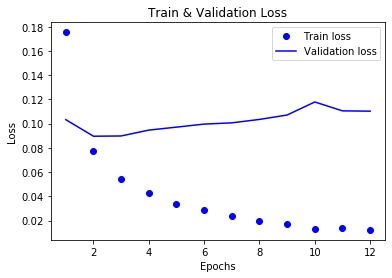

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Train & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

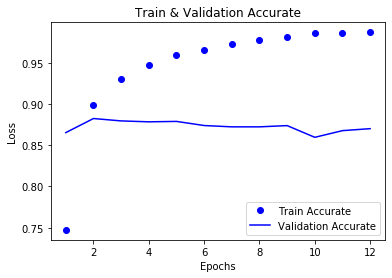

In [43]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Train Accurate')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accurate')
plt.title('Train & Validation Accurate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [44]:
model.predict(x_test) # I used worse Activation Function 'tanh' and I don't use 'sigmoid' at the end but prediction is more accurate(why?)

array([[0.        ],
       [1.0334734 ],
       [0.69485843],
       ...,
       [0.        ],
       [0.        ],
       [0.99015623]], dtype=float32)

In [51]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in test_data[0]])

In [52]:
decoded_review

"? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss"

In [53]:
decoded_review1 = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in test_data[1]])

In [54]:
decoded_review1

"? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual ? and desperation be patient ? up the atmosphere and pay attenti